(c) 2023 Manuel Razo. This work is licensed under a [Creative Commons
Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/).
All code contained herein is licensed under an [MIT
license](https://opensource.org/licenses/MIT).

# Modelando el dogma central

En este ejercicio, analizaremos las ecuaciones diferenciales que describen la
expresión de un gen. Para empezar, comencemos con el caso más sencillo de todos:
un gen que se expresa de manera constitutiva, es decir, un gen sin regulación.

## Expresión constitutiva

Imaginemos que queremos modelar cómo cambia la cantidad de RNA mensajero (mRNA)
en la célula. Para esto definimos la variable $m(t)$ que representará el número
promedio de un mRNA en particular en un conjunto de células. Nótese que el mRNA
es un objeto discreto. Es decir, en una célula no tendría sentido hablar de
tener 1.5 mRNA o nada que no sea un número entero. Pero cuando hablamos del
*promedio* de mRNAs en una población de células, esta cantidad sí puede
considerarse como continua.

Pensemos cuáles son los procesos que pueden ocurrir en una célula que cambiarían
el número de mRNAs. Existen al menos dos procesos que tenemos que considerar:
1. la produción de una molécula de mRNA,
2. la degradación de una molécula de mRNA. 

El modelo que escribamos que describa la dinámica del número de mRNAs entonces
tiene que incluir estos dos procesos. Recordemos que una ecuación diferencial es
una simple regla de cambio de cómo varía en el tiempo una cantidad de interés.
Nuestro objetivo es entonces predecir el número de mRNAs en un instante en el
futuro, $m(t + \Delta t)$ dada la información presente. Podemos entonces
escribir
$$
m(t + \Delta t) = 
\underbrace{m(t)}_{\text{\# de mRNA ahora}}
+ \overbrace{r\Delta t}^{\text{producción constante de mRNA}}
- \underbrace{\gamma \; m(t) \Delta t}_{\text{degradación de mRNA}}.
\tag{1}
$$

Disectemos cada uno de los términos en la Eq. 1. El primer término del lado
derecho nos dice que el número de mRNAs en un instante en el futuro depende del
número presente de mRNAs. El siguiente término, $r \Delta t$ captura la idea de
expresición constitutiva. La producción de nuevos mRNAs no depende del número 
actual de mRNAs. Depende de otros factores como el número de RNA polimerasas y
de nucleótidos en la célula. Pero capturaremos toda esa complejidad en un simple
parámetro constante $r$ que debe de tener unidades de
$$
r [=] \frac{\text{mRNA}}{\text{tiempo}}.
\tag{2}
$$
Es decir, es una tasa de producción de mRNAs. El tercer término de lado derecho
de la Eq. 1 representa la degradación de mRNAs. La cantidad de mRNAs que se
degradan en una ventana de tiempo $\Delta t$ depende del número actual de mRNAs.
Pensémoslo de la siguiente manera. Imaginemos que cada instante, cada mRNA lanza
una moneda con probabilidad $\gamma \Delta t$ de caer en sello. Si cae en sello,
el mRNA se degrada. Si cae en águila con probabilidad $1 - \gamma \Delta$, el
mRNA no es degradado. La clave es que la probabilidad $\gamma \Delta$ es muy
pequeña, por lo que no veremos a todos lo mRNAs degradarse simultaneamente.
Digamos que si tenemos 100 mRNAs, en promedio veremos a uno degradarse en cada
instante. Esto implica que si tenemos 1000 mRNAs, esperamos ver 10 veces más
eventos de degradación. Es eso lo que captura el multiplicar la tasa de
degradación $\gamma$ con el numero de mRNAs. Esta tasa de degradación tiene
unidades de
$$
\gamma [=] \frac{1}{\text{tiempo}},
\tag{3}
$$
que no son las mismas que en la Eq. 2.

Comencemos por importar los paquetes que necesitaremos.

In [1]:
# Importar paquete para analisis numerico
import numpy as np

# Importar paquete para graficar curvas
import matplotlib.pyplot as plt

# Importar paquete para estilo de graficas
import seaborn as sns

# Establecer estilo de grafica
sns.set_theme()

Habiendo escrito la Eq. 1, definamos los parámetros para integrar esta ecuación
numéricamente.

In [2]:
# Definir tamaño de pasa de tiempo
delta_t = 0.01

# Definir el tiempo de integración
t = 100

# Calcular el numero de pasos
n_steps = int(t / delta_t)

# Definir los tiempos en que se evalua la ecuaion
t_array = np.linspace(0, t, n_steps)

# Definir el numero inicial de mRNAs
m_init = 0

# Definir tasa de prduccion
r = 1   # [=] mRNA / tiempo

# Definir la tasa de degradacion
gamma = 0.1     # [=] 1 / tiempo

Con los parámetros en mano, definamos la Eq. 1 en un ciclo `for`.

In [3]:
# Inicializar arreglo para almacenar numero de mRNAs
m_array = np.zeros(n_steps)

# Agregar condicion inicial
m_array[0] = m_init

# Iterar en cada paso de tiempo
for t in range(n_steps - 1):
    m_array[t+1] = m_array[t] + r * delta_t - gamma * delta_t * m_array[t]

Grafiquemos el resultado

Text(0, 0.5, 'mRNA/cell')

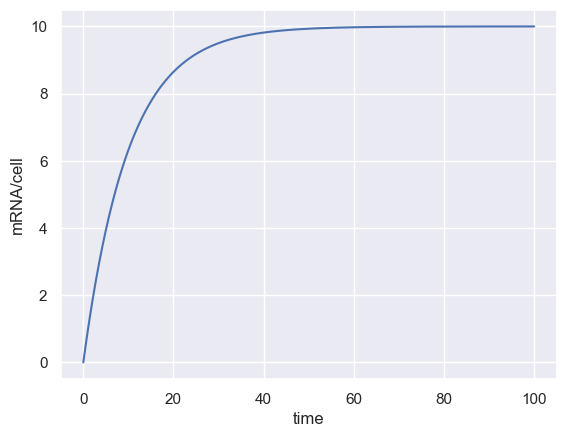

In [4]:
# Graficar tiempo vs masa
plt.plot(t_array, m_array)

# Anotar ejes
plt.xlabel("time")
plt.ylabel("mRNA/cell")

Podemos observar que el valor de mRNAs converge a 10 mRNA por célula. Esto
ocurre cuando la tasa de producción es la misma que la tasa de degradación.
Llamemos a este valor al que convergen los mRNAs $m^*$. Es lo que se conoce como
el "steady state" o estado estable del sistema dinámico. El valor de este estado
estable depende de los parámetros $r$ y $\gamma$. Podemos encontrar cómo se
relacionan esos parámetros con un poco de álgebra.


## Calculando el estado estable del sistema

Para poder calcular el valor de $m^*$ pensando de la siguiente manera: el llegar
a un estado estable significa que el valor de $m(t)$ ya no cambia en el tiempo.
Esto implica que cuando $t$ es muy grande, encontramos que
$$
m(t + \Delta t) = m(t),
\tag{4}
$$
es decir, el valor de $m(t)$ se mantiene constante. Usando esta equivalencia
podemos sustituir el lado izquierdo de la Eq. 1, obteniendo
$$
m(t) = m(t) + r\Delta t - \gamma \; m(t) \Delta t.
\tag{5}
$$
Podemos entonces cancelar el término en el lado izquierdo con el primer término
del lado derecho. Esto resulta en
$$
0 = r\Delta t - \gamma \; m^* \Delta t,
\tag{6}
$$
donde sustituímos $m(t)$ por $m^*$ porque estamos asumiendo que llegamos al
estado estable que estamos buscando. Podemos despejar los términos para dejar a
$m^*$ aislado, obteniendo
$$
m^* = \frac{r\Delta t}{\gamma \Delta t} = \frac{r}{\gamma}.
\tag{7}
$$
Este resultado demuestra que el estado estable del sistema está definido por el
cociente de la tasa de producción $r$ y la de degradación $\gamma$. Para
demostrar que este resultado aplica independiente del número inicial de mRNAs,
repitamos la integración numérica, esta vez con múltiples condiciones iniciales.

In [5]:
# Definir tasa de produccion
r = 1
# Definir tasa de degradacion
gamma = 0.1
# Definir lista de condiciones iniciales
m_init = np.array([0.0, 3.0, 6.0, 14.0, 17.0, 20.0])

# Inicializar matriz para salvar numero de mRNAs
m_mat = np.zeros([len(t_array), len(m_init)])

# Guardemos la condicion inicial
m_mat[0, :] = m_init


# Ciclemos por los puntos en el tiempo
for t in range(len(t_array) - 1):
    # Ciclemos por las condiciones iniciales
    for m in range(len(m_init)):
        m_mat[t+1, m] = m_mat[t, m] + r * delta_t - \
            gamma * delta_t * m_mat[t, m]

Grafiquemos cada una de las trajectorias.

Text(0, 0.5, 'mRNA/cell')

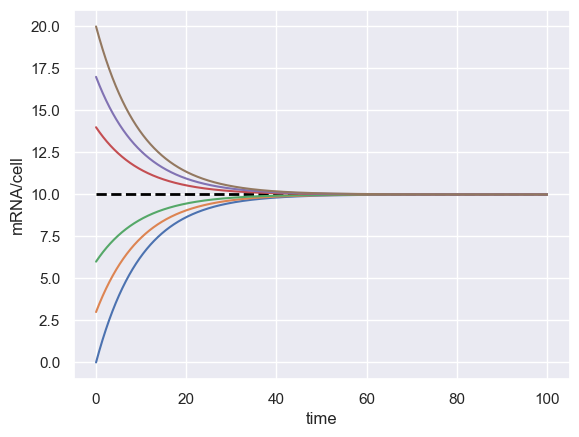

In [6]:
# Graficar estado estable predicho
plt.hlines(r / gamma, min(t_array), max(t_array),
           linestyle="--", color="black", linewidth=2)

# Ciclar por condiciones iniciales
for m in range(np.shape(m_mat)[1]):
    plt.plot(t_array, m_mat[:, m])

# Anotar ejes
plt.xlabel("time")
plt.ylabel("mRNA/cell")

Como lo derivamos analíticamente, sin importar la codición inicial, todas las
trayectorias convergen al estado estable definido por la Eq. 7.

## Regulación via factores de transcripción

Uno de los grandes descubrimientos de la biología molecular del siglo XX fue el
del concepto de la regulación genética. Sabemos que una bacteria tiene en 
promedio 5000 genes en su genoma. Pero no todos los genes son expresados en todo
momento. Esto tiene sentido biológico; ¿por qué invertirían recursos las células
en funciones que no son necesarias en dicho momento si pudieran prender/apagar
sus genes dependiendo del estado del ambiente?

Dos de los principales modos de regulación genética se pueden definir como:
1. **Activación**: Regulación positiva de un gen para aumentar su nivel de
   expresión basal.
2. **Represión**: Regulación negativa de un gen para disminuir su nivel de
   expresión basal.

Existen diferentes mecanismos moleculares para implementar estos tipos de
regulación. Pero el que nos interesa en este momento es la regulación dada por
proteínas conocidas como *factores de transcripción*. Estas proteínas tienen la
habilidad de reconocer secuencias específicas en el genoma⸺es decir conjuntos de
≈ 10–20 letras como `ATGGTACGCTAGCTATGCGT`⸺conocidas como "sitios de unión"
(binding sites en inglés). Al reconocer esas secuencias los factores de
transcripción se unen al ADN, cambiando el estado de transcripción del gen que
cuenta con dicho sitio de unión de manera positiva (activadores) o negativa
(represores).

El nivel de regulación de un factor de transcripción depende tanto de cuánta
afinidad tiene la proteína por su sitio de unión como de cuántos factores de
transcripción están flotando en la célula. Entre más fuerte se una el factor de
transcipción al ADN o entre más proteínas existan en la célula, más fuerte será
la regulación. Una manear común de modelar el efecto de estas dos variables es
usando las llamadas funciones de Hill. La función de Hill es una relación
empírica, es decir, no es un resultado exacto que siga principios físicos, que
modela la probabilidad de encontrar un factor de transcripción unido a su sitio
de unión. Otra manera de pensar en esta cantidad es como la fracción de las
ocasiones que esperarías encontrar un factor de transcripción en su sitio de
unión si aleatoriamente observaras este sitio multiples veces. Esta función es
de la forma
$$
h([c]) = \frac{[c]^n}{[c]^n + (K_a)^n},
\tag{8}
$$
donde $[c]$ es la concentración de la molécula de interés⸺en nuestro caso el
factor de transcripción⸺$K_a$ es un parámetro que modela la afinidad del factor
de transcripción por su sitio de unión. Específicamente, $K_a$ tiene las mismas
unidades de concentración que $[c]$ y representala concentración a la que el
factor de transcripción tiene 50% de estar en su sitio. $n$ es el parámetro
conocido como el coeficiente de Hill que captura qué tan abrupto es el cambio de
actividad del factor de transcripción. El lado izquierdo de la Eq. 8, $h([c])$,
siendo una probabilidad, puede tomar valores entre **zero** y **uno**.

Para ganar intuición sobre esta función, grafiquemos un ejemplo sencillo.

Text(0, 0.5, 'binding probability')

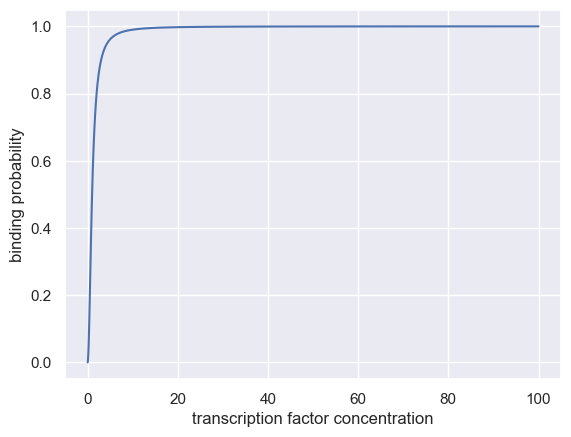

In [7]:
# Definir un rango de concentraciones
c_array = np.logspace(-2, 2, 100)

# Definir `Ka` y `n`
Ka = 1
n = 2

# Calcular h para cada concentracion
h_array = c_array ** n / (c_array ** n + Ka ** n)

# Graficar curva
plt.plot(c_array, h_array)

# Anotar ejes
plt.xlabel("transcription factor concentration")
plt.ylabel("binding probability")

Podemos ver que la función tiene la forma que esperábamos, entre más aumenta la
concentración del factor de transcripción, más aumenta el valor de la función
$h([c])$. Pero, esta gráfica puede ser más intuitiva si cambiamos la escala del
eje de las $x$ a una escala logarítmica.

Text(0, 0.5, 'binding probability')

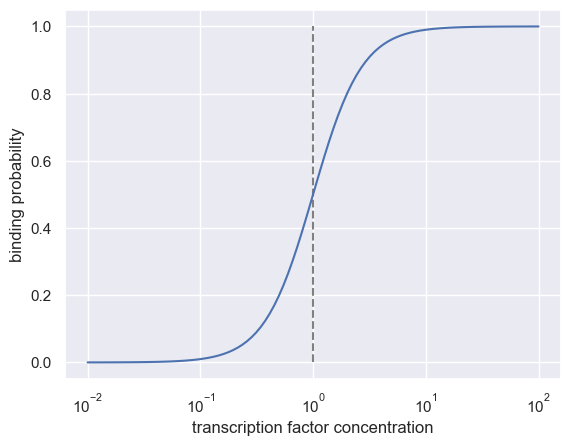

In [8]:
# Agregar linea vertical en el valor de Ka
plt.vlines(Ka, 0, 1, color="gray", linestyles="dashed")

# Graficar curva
plt.plot(c_array, h_array)

# Cambiar escala de eje x
plt.xscale("log")

# Anotar ejes
plt.xlabel("transcription factor concentration")
plt.ylabel("binding probability")

Usando esta escala logarítmica podemos apreciar el comportamiento de la función
de Hill. Claramente vemos que conforme aumenta la concentración del factor de
transcripción, la probabilidad de encontrar un factor en su sitio de unión
aumenta entre los valores de 0 y 1. También podemos ver que cuando $[c] = K_a$,
la actividad del factor de transcripción llega a 0.5, es decir, $K_a$ determina
la concentración de factor de transcripción en la que esperamos proabilidad del
50% de encontrar al factor en su sitio de unión.

Estudiemos los efectos de los parámetros $K_a$ y $n$ cambiándolos
sistemáticamente. Primero, cambiemos el valor de $K_a$

Text(0, 0.5, 'binding probability')

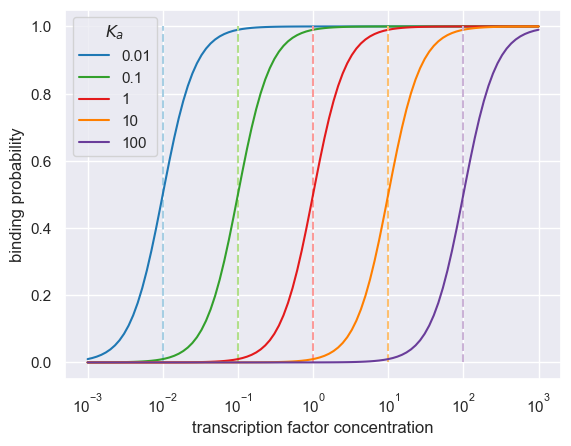

In [9]:
# Definir un rango de concentraciones
c_array = np.logspace(-3, 3, 100)

# Definir valores de Ka
Ka_array = [0.01, 0.1, 1, 10, 100]
# Definir valor de n
n = 2

# Inicializar matrix para salvar resultados
h_mat = np.zeros([len(c_array), len(Ka_array)])

# Definir colors
colors = sns.color_palette("Paired")

# Ciclar por cada valor de Ka
for i, Ka in enumerate(Ka_array):
    # Caclcular h para cada concentracion
    h_mat[:, i] = c_array ** n / (c_array ** n + Ka ** n)

    # Agregar linea vertical en el valor de Ka
    plt.vlines(Ka, 0, 1, color=colors[i*2], linestyles="dashed")

    # Graficar curva
    plt.plot(c_array, h_mat[:, i], label=f"{Ka}", color=colors[(i*2)+1])

# Cambiar escala de eje x
plt.xscale("log")

# Agregar leyenda
plt.legend(title=r"$K_a$")

# Anotar ejes
plt.xlabel("transcription factor concentration")
plt.ylabel("binding probability")

Con esta gráfica podemos ver que el cambiar el valor de $K_a$ mueve la curva de
manera horizontal en la escala logarítmica. Si la curva completa se desplaza a
la izquierda, esto significa que se necesita una menor concentración para lograr
cualqier probabilidad de unión. Esto significa que el factor de transcripción
tiene una mayor afinidad por su sitio de unión. Lo opuesto es cierto cuando la
curva se desplaza a la derecha.

Ahora exploremos el efecto del coeficiente de Hill.

Text(0, 0.5, 'binding probability')

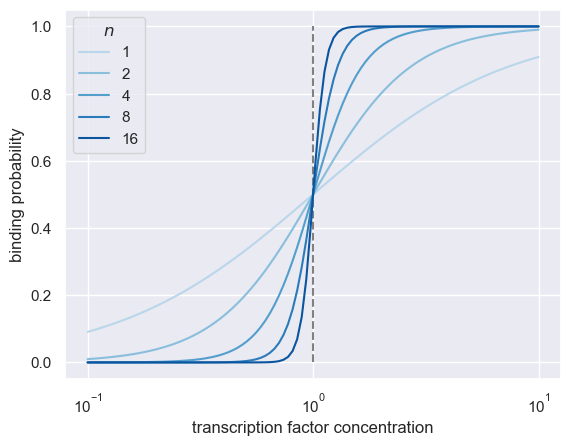

In [10]:
# Definir un rango de concentraciones
c_array = np.logspace(-1, 1, 100)

# Definir el valor de Ka
Ka = 1
# Definir valores de n
n_array = [1, 2, 4, 8, 16]

# Inicializar matrix para salvar resultados
h_mat = np.zeros([len(c_array), len(Ka_array)])

# Definir colors
colors = sns.color_palette("Blues")

# Agregar linea vertical en el valor de Ka
plt.vlines(Ka, 0, 1, color="gray", linestyles="dashed")

# Ciclar por cada valor de Ka
for i, n in enumerate(n_array):
    # Caclcular h para cada concentracion
    h_mat[:, i] = c_array ** n / (c_array ** n + Ka ** n)

    # Graficar curva
    plt.plot(c_array, h_mat[:, i], label=f"{n}", color=colors[i+1])

# Cambiar escala de eje x
plt.xscale("log")

# Agregar leyenda
plt.legend(title=r"$n$")

# Anotar ejes
plt.xlabel("transcription factor concentration")
plt.ylabel("binding probability")

Es claro que el parámetro $n$ controla la pendiente de la transición entre baja
y alta probabilidad de unión sin cambiar el punto donde se alcanza el 50% de
probabilidad⸺definido por $K_a$.

## Simple modelo de autoregulación

Combinemos lo que acabamos de aprender en las dos secciones anteriores.
Recordemos que primero modelamos la expresión de un gen constitutivo donde
pudimos calcular su nivel de expresión en el estado estable cuando la producción
era la misma que la degradación. Después, modelamos la actividad de un factor de
transcripción usando la ecuación de Hill.

Para poder combinar estos dos pasos tenemos que entender cómo es que un factor
de transcripción modifica el nivel de expresión de un gen. En nuestro modelo
constitutivo, tomamos la tasa de transcripción $r [=]
\frac{\text{mRNA}}{\text{tiempo}}$ como una constante. Sin embargo, en presencia
de un regulador, digamos un **represor**, esta actividad será modificada por el
la concentración de este represor. Podemos imaginar que el represor se une a su
sitio de unión, cerca del sitio de unión de la RNA polimerasa, impidiendo que la
transcripción se lleve a cabo. Algo así como tener una enorme roca estorbando en
la entrada de un túnel, por lo que ningún vehículo puede entrar al tunel. 

Podemos modelar el efecto que tiene el represor al multiplicar la tasa de
transcripción $r$ por $1 – h([c])$. La razón por la que lo multiplicamos por $1
– h([c])$ y no por $h([c])$ es porque estamos pensando en un represor. Entonces,
entre menor sea la probabilidad de encontrar al factor de transcripción en su
sitio de unión estorbando a la RNA polimerasa, más alta será la tasa de
transcripción. Otra manera de pensarlo es que la probabilidad que nos interesa
es el complemento, es decir la probabilidad de **no** encontrar al fractor de
transcripción unido en su sitio. Si modeláramos un activador donde la tasa de
transcripción aumenta entre más alta es la probilidad de encontrar al activador
en su sitio de transcripción sí lo multiplicaríamos por $h$ directamente.

Ahora imaginemos un modelo sencillo de auto–represión en la que el gen que
codifica al represor es regulado por la propia proteína que codifica. Para
simplificar nuestro análisis aún más, simplifiquemos el dogma central. Sabemos
que el flujo de información en las células es de la forma
$$
\text{DNA} \rightarrow \text{RNA} \rightarrow \text{proteína}.
\tag{9}
$$
Pero no hemos incluído el paso de traducción en el modelo que escribimos. 
Podemos hacer esto fácilmente (de hecho, deberías intentarlo en tu tiempo libre
como actividad autodidacta), pero por cuestiones de tiempo, imaginemos que el
model que escribimos al inicio para mRNA también expresa un dogma central 
simplificado de la forma
$$
\text{DNA} \rightarrow \text{proteína}.
\tag{10}
$$

Con esta modificación en mente, nuestra nueva ecuación diferencial para un gen
autoregulado por un factor de transcripción es de la forma
$$
p(t + \Delta t) = 
\underbrace{p(t)}_{\text{\# de proteína ahora}}
+ \overbrace{r[1 - h(p(t))]\Delta t}^{\text{producción regulada de proteína}}
- \underbrace{\gamma \; m(t) \Delta t}_{\text{degradación de proteína}},
\tag{11}
$$
donde $p(t)$ representa la concentración de proteina en el tiempo $t$. 

Para programar este término de manera más sencilla, primero definamos una
función en `Python` que calcule la el resultado de la ecuación de Hill.

In [11]:
def hill_fn(c, Ka, n):
    """
    Funcion que calcula pa probabilidad de union de un factor de transcripcion
    segun la ecuacion de Hill.

    Parametros
    ----------
    - c: Concentracion del factor de transcripcion.
    - Ka: Concentracion que define el 50% de probabilidad de union.
    - n: Coefficiente de Hill

    Regresa
    -------
    - h: Probabilidad de encontrar un factor de transcripcion en su sitio de
      union.
    """
    return c ** n / (c ** n + Ka ** n)

Ahora sí podemos definir todos los parámetros que entrarán en nuestra
integración numérica.

In [12]:
# Definir tamaño de pasa de tiempo
delta_t = 0.01

# Definir el tiempo de integración
t = 100

# Calcular el numero de pasos
n_steps = int(t / delta_t)

# Definir los tiempos en que se evalua la ecuaion
t_array = np.linspace(0, t, n_steps)

# Definir el numero inicial de mRNAs
p_init = 0

# Definir tasa de prduccion
r = 1   # [=] proteina / tiempo

# Definir la tasa de degradacion
gamma = 0.1     # [=] 1 / tiempo

# Definir Ka
Ka = 10

# Definir n
n = 2

Escribamos la Eq. 11 en un ciclo `for` para integrarla numéricamente. Para tener
una comparación, también integraremos la ecuación de un promotor constitutivo.

In [14]:
# Inicializar arreglo para almacenar numero de proteinas de un promotor
# constitutivo
p_array = np.zeros(n_steps)
# Inicializar arreglo para almacenar numero de proteinas de un promotor
# autoregulado
p_array_reg = np.zeros_like(p_array)

# Agregar condicion inicial
p_array[0] = p_init
p_array_reg[0] = p_init

# Iterar en cada paso de tiempo
for t in range(n_steps - 1):
    # Calcular expresion constitutiva
    p_array[t+1] = p_array[t] + r * delta_t - gamma * delta_t * p_array[t]
    # Calcular h
    h = hill_fn(p_array_reg[t], Ka, n)
    # Calcular expresion regulada
    p_array_reg[t+1] = p_array_reg[t] + r * (1 - h) * delta_t - \
        gamma * delta_t * p_array_reg[t]

Grafiquemos ambos resultados.

Text(0, 0.5, 'protein/cell')

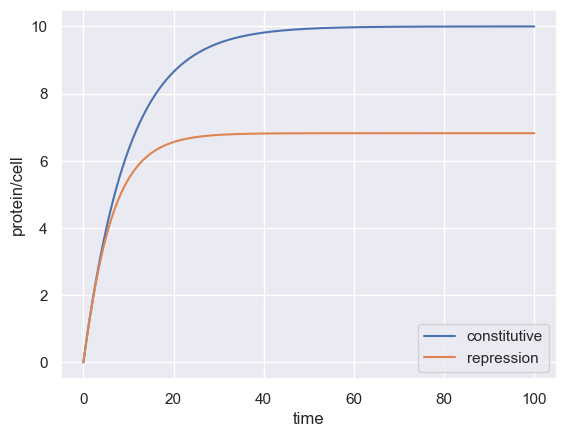

In [15]:
# Graficar tiempo vs masa
plt.plot(t_array, p_array, label="constitutive")
plt.plot(t_array, p_array_reg, label="repression")

# Agregar leyenda
plt.legend()

# Anotar ejes
plt.xlabel("time")
plt.ylabel("protein/cell")

Como esperábamos, la presencia del represor reduce la cantidad de proteína en el
estado estable.

# Conclusión

En este tutorial aprendimos sobre los modelos más básicos para representar los
procesos del dogma central de la biología molecular. Modelando la dinámica de
produción de mRNAs (o proteínas) vimos la existencia de un estado estable donde
la produción es igual a la degradación. También aprendimos sobre cómo incluir
regulación genética dada por factores de transcripción. Estos conceptos básicos
nos ayudarán a modelar circuitos genéticos más complejos.